In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from IPython.interactiveshell import InteractiveShell

In [3]:
from sklearn.datasets import make_moons

In [4]:
X,y = make_moons(n_samples=10000, noise=0.5, random_state=0)

In [5]:
from sklearn.model_selection import train_test_split


In [51]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(8000, 2) (2000, 2) (8000,) (2000,)


In [52]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier #clasification tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## AdaBoost

In [53]:
model_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 10),n_estimators=500,learning_rate = 1)

In [54]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [55]:
y_pred_ada = model_ada.predict(X_test)
#y_prob = model_ada.predict_proba(X_test)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

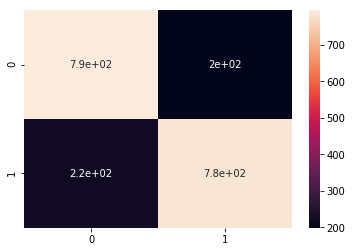

In [57]:
cm_ada = confusion_matrix(y_test,y_pred_ada)
sns.heatmap(cm_ada,fmt='.2g',annot = True)

In [58]:
cr_ada = classification_report(y_test,y_pred_ada)
print(cr_ada)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       993
           1       0.80      0.78      0.79      1007

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



## GradientBoosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
model_grad = GradientBoostingClassifier(n_estimators=500,max_depth=10)

In [61]:
model_grad.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
y_pred_grad = model_grad.predict(X_test)
y_prob = model_grad.predict_proba(X_test)

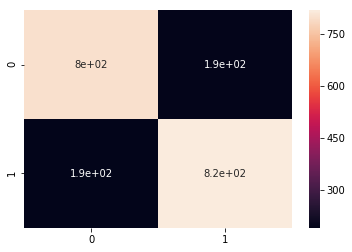

In [63]:
cm_grad = confusion_matrix(y_test,y_pred_grad)
sns.heatmap(cm_grad,annot = True)

In [64]:
cr_grad = classification_report(y_test,y_pred_grad)
print(cr_grad)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       993
           1       0.81      0.81      0.81      1007

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [65]:
model_tree = DecisionTreeClassifier().fit(X_train,y_train)

In [66]:
y_pred_tree = model_tree.predict(X_test)

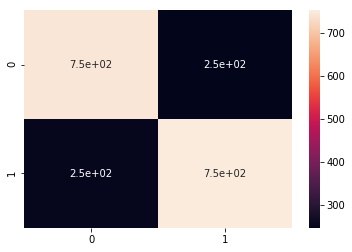

In [67]:
cm_tree = confusion_matrix(y_test,y_pred_tree)
sns.heatmap(cm_tree,annot = True)

In [68]:
cr_tree = classification_report(y_test,y_pred_tree)
print(cr_tree)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       993
           1       0.75      0.75      0.75      1007

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



In [69]:
classification_algos_name = ["SVC", "KNeighborsClassifier", "GaussianNB", 
                              "LogisticRegression", "DecisionTreeClassifier", 
                             "RandomForestClassifier", "AdaBoostClassifier",
                            "GradientBoostingClassifier"]

In [70]:
classification_algos=[SVC(), KNeighborsClassifier(), GaussianNB(),
                      LogisticRegression(), 
                      DecisionTreeClassifier(), RandomForestClassifier(),
                      AdaBoostClassifier(),GradientBoostingClassifier()]

In [71]:
accuracy_score_list = []
for mod in classification_algos:
    model = mod
    model.fit(X_train, y_train)
    y_pred_all = model.predict(X_test)
    accuracy_score_list.append(accuracy_score(y_test,y_pred_all))
for idx,i in enumerate(accuracy_score_list):
    print(classification_algos_name[idx]," ",i)

SVC   0.83
KNeighborsClassifier   0.808
GaussianNB   0.818
LogisticRegression   0.8195
DecisionTreeClassifier   0.749
RandomForestClassifier   0.807
AdaBoostClassifier   0.825
GradientBoostingClassifier   0.8335


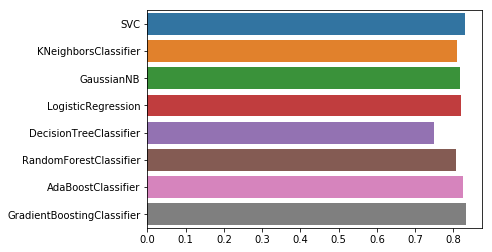

In [72]:
sns.barplot(x = accuracy_score_list, y = classification_algos_name)